In [13]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import progress
from workalendar.america import Brazil

In [14]:
data = pd.read_excel('economatica.xlsx',header=3, index_col=0)

In [15]:
data

,Fechamento\najust p/ prov\nEm moeda orig\nCDI 252 dias,Fechamento\najust p/ prov\nEm moeda orig\nDI1X11,Fechamento\najust p/ prov\nEm moeda orig\nDI1F12,Fechamento\najust p/ prov\nEm moeda orig\nDI1J12,Fechamento\najust p/ prov\nEm moeda orig\nDI1K12,Fechamento\najust p/ prov\nEm moeda orig\nDI1M12,Fechamento\najust p/ prov\nEm moeda orig\nDI1N12,Fechamento\najust p/ prov\nEm moeda orig\nDI1Q12,Fechamento\najust p/ prov\nEm moeda orig\nDI1V12,Fechamento\najust p/ prov\nEm moeda orig\nDI1X12,...,Fechamento\najust p/ prov\nEm moeda orig\nDI1V25,Fechamento\najust p/ prov\nEm moeda orig\nDI1F26,Fechamento\najust p/ prov\nEm moeda orig\nDI1N26,Fechamento\najust p/ prov\nEm moeda orig\nDI1F27,Fechamento\najust p/ prov\nEm moeda orig\nDI1F28,Fechamento\najust p/ prov\nEm moeda orig\nDI1F29,Fechamento\najust p/ prov\nEm moeda orig\nDI1F30,Fechamento\najust p/ prov\nEm moeda orig\nDI1F31,Fechamento\najust p/ prov\nEm moeda orig\nDI1F33,Fechamento\najust p/ prov\nEm moeda orig\nDI1F35
Data,,,,,,,,,,,,,,,,,,,,,
1986-03-06,18.7148,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-07,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-10,18.9841,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-11,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-12,18.5057,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2020-10-13,1.9,-,-,-,-,-,-,-,-,-,...,6.77,6.93,-,7.38,7.65,7.95,-,8.26,-,-
2020-10-14,1.9,-,-,-,-,-,-,-,-,-,...,6.82,6.91,7.15,7.37,7.67,7.91,-,8.22,-,-


In [16]:
 def get_datetime_from_name(data):
    """
    Returns datetime given columns with derivatives' names.
    """
    letters_months = {'F':'01','G':'02','H':'03','J':'04','K':'05','M':'06','N':'07','Q':'08','U':'09','V':'10','X':'11','Z':'12'}
    dates = []
    i = 0
    for column in data.columns:
        i += 1
        if i > 1:
            month_l = column[-3:-2]
            year_n  = column[-2:]
            month_n = letters_months[month_l]
            dates.append(f'{month_n}/20{year_n}')
    datetime = pd.to_datetime(dates,format='%m/%Y')
    return datetime

datetime = get_datetime_from_name(data)

In [17]:
def get_working_day_from_months(datetime):
    cal = Brazil()
    dates = []
    for col in datetime:
        work = cal.is_working_day(col)
        if  work:
            dates.append(col)
        else:
            new = cal.add_working_days(col, 1)
            work = cal.is_working_day(new)
            if work:
                dates.append(new)
            else:
                print('deu merda')
    dates = pd.to_datetime(dates)
    cols = [0]
    for d in dates:
        cols.append(d)
    return cols

In [18]:
data.columns = get_working_day_from_months(datetime)

In [19]:
data

,0,2011-11-01 00:00:00,2012-01-02 00:00:00,2012-04-02 00:00:00,2012-05-02 00:00:00,2012-06-01 00:00:00,2012-07-02 00:00:00,2012-08-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,...,2025-10-01 00:00:00,2026-01-02 00:00:00,2026-07-01 00:00:00,2027-01-04 00:00:00,2028-01-03 00:00:00,2029-01-02 00:00:00,2030-01-02 00:00:00,2031-01-02 00:00:00,2033-01-03 00:00:00,2035-01-02 00:00:00
Data,,,,,,,,,,,,,,,,,,,,,
1986-03-06,18.7148,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-07,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-10,18.9841,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-11,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1986-03-12,18.5057,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2020-10-13,1.9,-,-,-,-,-,-,-,-,-,...,6.77,6.93,-,7.38,7.65,7.95,-,8.26,-,-
2020-10-14,1.9,-,-,-,-,-,-,-,-,-,...,6.82,6.91,7.15,7.37,7.67,7.91,-,8.22,-,-


In [20]:

progress.update(0)
lenght = len(data)
df = pd.DataFrame()
i = 0
for index in data.index:
    i += 1
    dictio = {}
    e = 0
    for column in data.columns:
        e += 1
        if e == 1:
            days = datetime.timedelta(0)
            value = data[column][index]
            if type(value) == float:
                dictio[days] = value
        else:
            days  = column - index
            value = data[column][index]
            if type(value) == float:
                dictio[days] = value
    series = pd.Series(dictio,name=index)
    df = df.append(series)
    progress.update(i/lenght)

Progress: [--------------------] 0.0% 


AttributeError: 'DatetimeIndex' object has no attribute 'timedelta'

In [ ]:
df = df.reindex(sorted(df.columns), axis=1)
df.to_pickle('df.pickle')

In [ ]:
df.head()

In [ ]:
d = df.iloc[:,:]


dat = d.to_numpy()
col = np.linspace(1,len(d.columns),len(d.columns))
ind = np.linspace(0,len(d.index)-1,len(d.index))


X = np.array([[i for e in col] for i in ind])

Y = np.array([col for i in ind])

Z = dat

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
plt.show()

In [163]:
a = d.iloc[1000:1001,:].dropna(axis=1)

In [173]:
dat = a.to_numpy()[0]
ind = a.columns.to_numpy() / np.timedelta64(1, 'D')

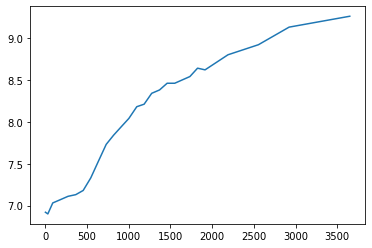

In [177]:
fig, ax = plt.subplots()
ax.plot(ind,dat)
plt.show()

In [179]:
from scipy.optimize import minimize

In [233]:
def polinomial(x):
    s = np.zeros(len(ind))
    for r in range(len(x)): 
        s += x[r]*ind**r
    return s

def objective(x):
    return np.sum(np.square(dat-polinomial(x)))

x0 = np.linspace(0,0,3)

res = minimize(objective,x0,method='SLSQP')
res.x

array([ 6.67132364e+00,  1.65153802e-03, -2.87041209e-07])

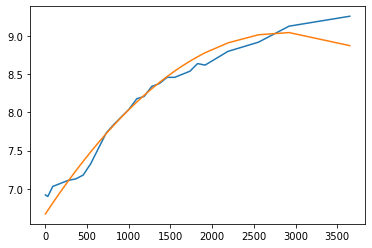

In [234]:
fig, ax = plt.subplots()
ax.plot(ind,dat)
ax.plot(ind,polinomial(res.x))
plt.show()

In [235]:
np.sum(np.square(dat-polinomial(res.x)))

0.47811400286521233